# Billionaire dataset descriptive analysis

# Step 3: Industry trends

Analyze patterns in industries where billionaires operate.

Techniques:

Category Breakdown:
- Pie chart or bar chart for category to see which industries dominate.

Industry-Specific Wealth:
- Calculate average and total finalWorth for each category or industries.
- Line plot to compare wealth across industries by country or residenceStateRegion.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.patches import Patch
import geopandas as gpd

%matplotlib inline

In [3]:
pd.set_option("display.max_columns", None)
sns.set_style('darkgrid')

In [4]:
df_bill_str = pd.read_csv("./datasets/billionaires_string.csv")
df_bill_num = pd.read_csv("./datasets/billionaires_numeric.csv")
df_bill_num_cat = pd.read_csv("./datasets/billionaires_numeric_modified_2.csv")

Analyze patterns in industries where billionaires operate.

Techniques:

Category Breakdown:
- Pie chart or bar chart for category to see which industries dominate.
Industry-Specific Wealth:
- Calculate average and total finalWorth for each category or industries.
- Line plot to compare wealth across industries by country or residenceStateRegion.

## 3.1. Pie chart or bar chart for category to see which industries dominate.

[]

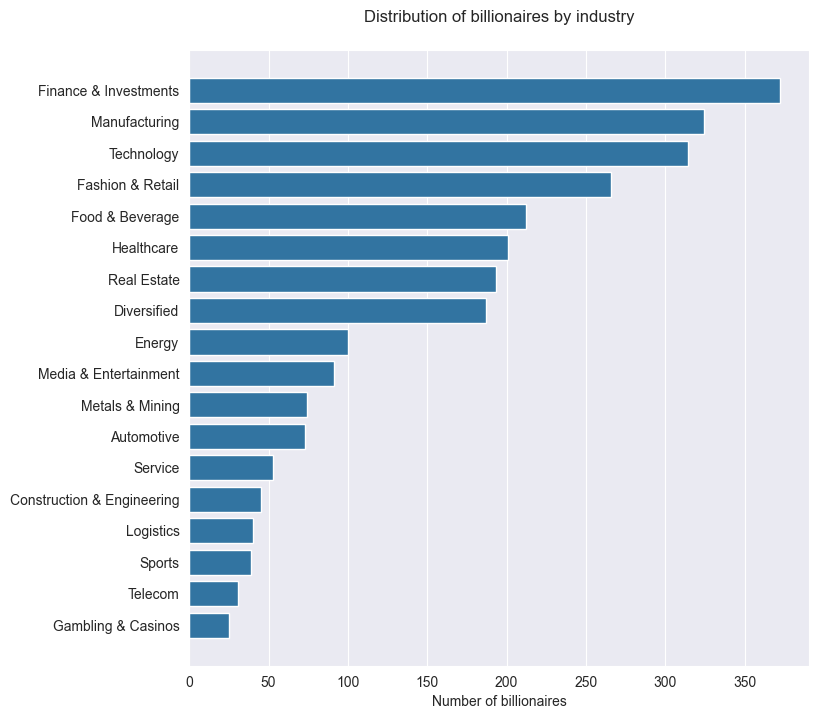

In [5]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_bill_str, y='industries', order=df_bill_str['industries'].value_counts().index)
plt.title("Distribution of billionaires by industry", pad=20)
plt.xlabel("Number of billionaires")
plt.ylabel(None)
plt.plot()

In [6]:
df_bill_str_usa = df_bill_str[df_bill_str['country'] == 'United States'].copy()

[]

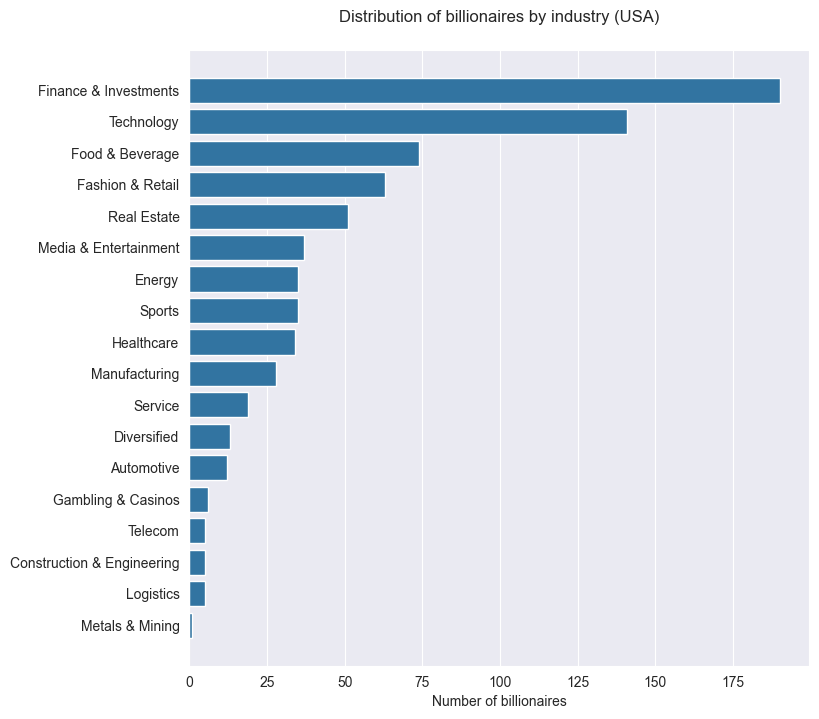

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_bill_str_usa, y='industries', order=df_bill_str_usa['industries'].value_counts().index)
plt.title("Distribution of billionaires by industry (USA)", pad=20)
plt.xlabel("Number of billionaires")
plt.ylabel(None)
plt.plot()

## 3.2. Calculate average and total finalWorth for each category or industries.

In [8]:
df_bill_num_cat.head(4)

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571,NaN
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii


In [9]:
df_bill_num_cat['totalWealthCat'] = df_bill_num_cat.groupby('category')['finalWorth'].transform('sum')

df_bill_num_cat['meanWealthCat'] = df_bill_num_cat.groupby('category')['finalWorth'].transform('mean')

In [10]:
df_bill_num_cat.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state,totalWealthCat,meanWealthCat
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571,NaN,1698800,6386.466165
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas,525300,7195.890411
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii,1877900,5980.573248
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska,1605100,4314.784946


## 3.3. Line plot to compare wealth across industries by country or residenceStateRegion.

In [11]:
wealth_country_industry_grouped =  df_bill_num_cat.groupby(['country', 'category'])['finalWorth'].agg(['sum', 'mean'])

In [12]:
wealth_country_industry_grouped_sorted = wealth_country_industry_grouped.sort_values(by=['sum', 'mean'], ascending=False)

In [28]:
# Calculate total wealth by country
total_wealth_by_country = df_bill_num_cat.groupby('country')['finalWorth'].sum().reset_index()

# Select the top 10 countries by total wealth
top_countries = total_wealth_by_country.nlargest(6, 'finalWorth')['country']

# Filter data for the top 10 countries
filtered_data = df_bill_num_cat[df_bill_num_cat['country'].isin(top_countries)]

# Group data by country and industries, calculate total wealth
wealth_by_industry_country = filtered_data.groupby(['country', 'category'])['finalWorth'].sum().reset_index()

# Pivot the data for easier plotting (industries as columns)
wealth_pivot = wealth_by_industry_country.pivot(index='category', columns='country', values='finalWorth').fillna(0)

# Calculate total wealth per industry and sort industries in descending order
wealth_pivot['TotalWealth'] = wealth_pivot.sum(axis=1)  # Add a column for total wealth
wealth_pivot = wealth_pivot.sort_values(by='TotalWealth', ascending=True)  # Sort by total wealth
wealth_pivot = wealth_pivot.drop(columns='TotalWealth')  # Drop the helper column after sorting

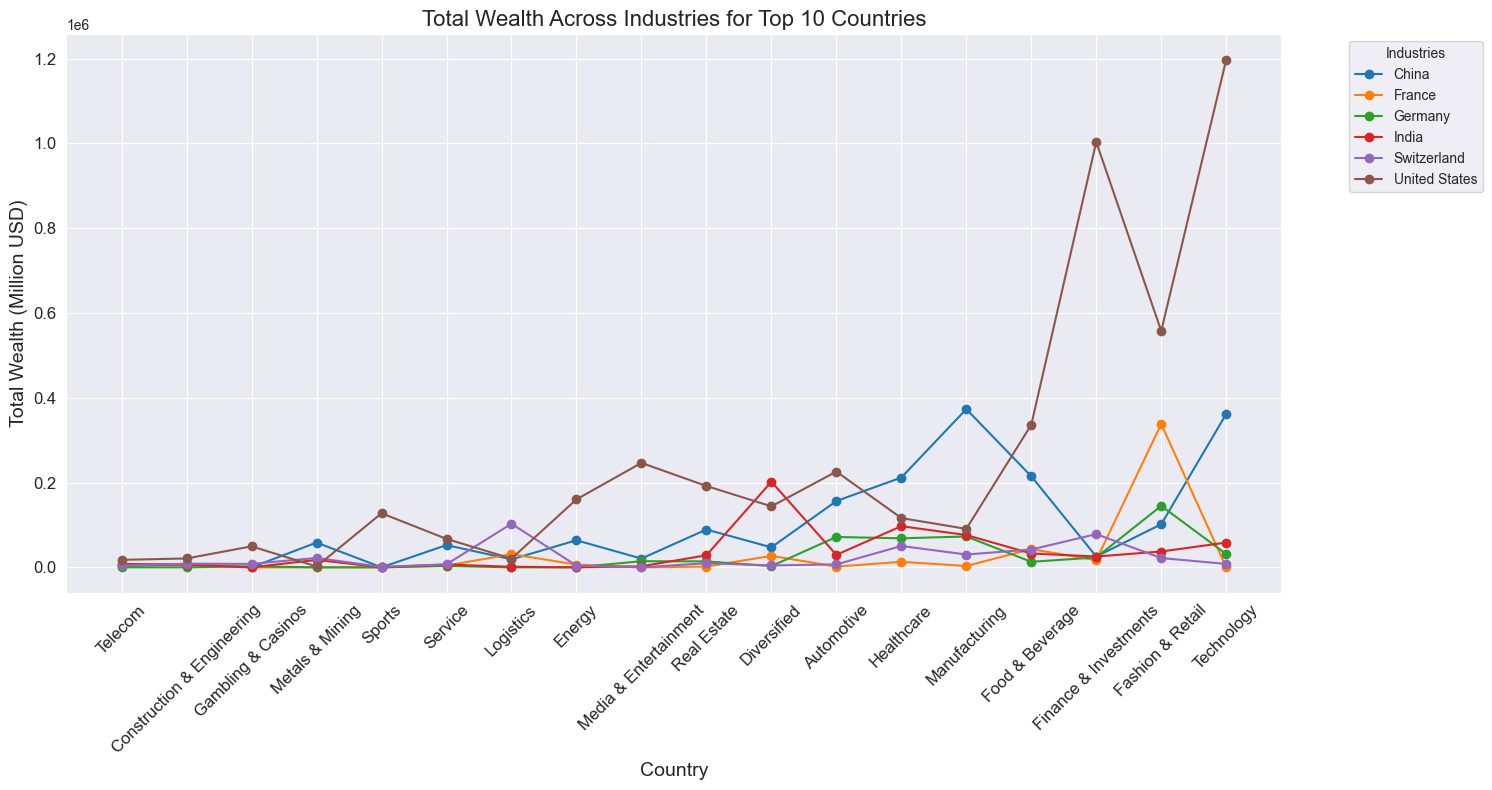

In [29]:

# Plot the line plot
plt.figure(figsize=(15, 8))
for country in wealth_pivot.columns:
    plt.plot(wealth_pivot.index, wealth_pivot[country], label=country, marker='o')

# Customize the plot
plt.title('Total Wealth Across Industries for Top 10 Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Wealth (Million USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Industries', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
wealth_pivot

country,China,France,Germany,India,Switzerland,United States
category,,,,,,
Telecom,3300.0,6700.0,0.0,8000.0,4300.0,17600.0
Construction & Engineering,7000.0,6800.0,0.0,6100.0,8600.0,20900.0
Gambling & Casinos,0.0,0.0,2400.0,0.0,8100.0,49500.0
Metals & Mining,58400.0,0.0,0.0,17500.0,22100.0,2000.0
Sports,0.0,0.0,0.0,0.0,1100.0,127500.0
Service,52400.0,4100.0,3200.0,6600.0,7100.0,67100.0
Logistics,18700.0,31000.0,0.0,1300.0,102800.0,20500.0
Energy,63800.0,6400.0,0.0,0.0,4000.0,160300.0
Media & Entertainment,20600.0,0.0,14400.0,2400.0,0.0,246400.0


<Figure size 1500x800 with 0 Axes>

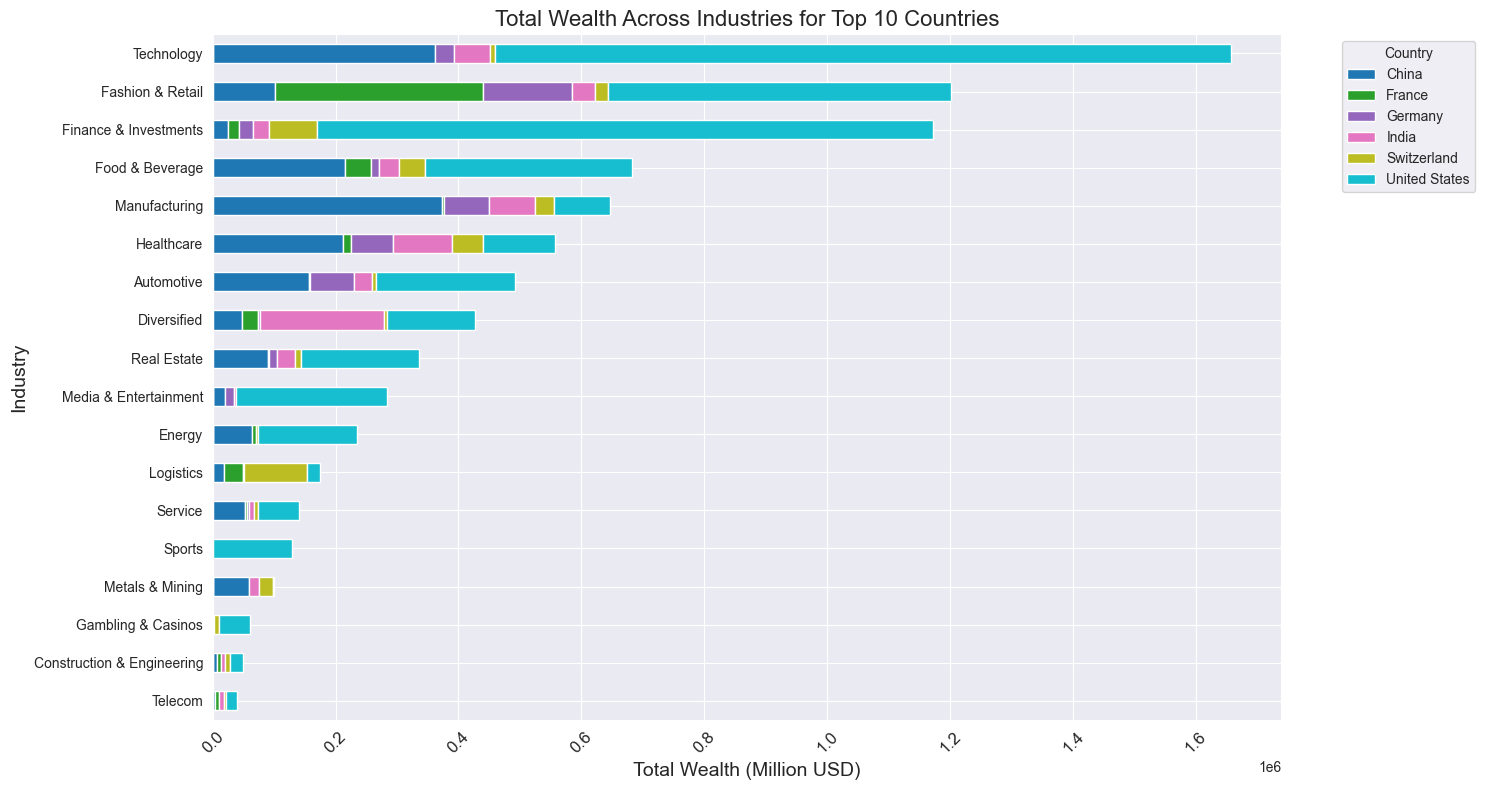

In [34]:
# Create the stacked bar chart
plt.figure(figsize=(15, 8))
wealth_pivot.plot(kind='barh', stacked=True, figsize=(15, 8), cmap='tab10')

# Customize the plot
plt.title('Total Wealth Across Industries for Top 10 Countries', fontsize=16)
plt.xlabel('Total Wealth (Million USD)', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
df_bill_num_cat.to_csv("./datasets/billionaires_numeric_modified_3.csv", index=False)

In [49]:
df_bill_str_usa

,category,personName,country,city,source,industries,countryOfCitizenship,organization,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,gdp_country
1,Automotive,Elon Musk,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,D,M,1971-06-28 00:00:00,Musk,Elon,CEO,2023-04-04 05:01:00,Texas,South,"$21,427,700,000,000"
2,Technology,Jeff Bezos,United States,Medina,Amazon,Technology,United States,Amazon,D,M,1964-01-12 00:00:00,Bezos,Jeff,Chairman and Founder,2023-04-04 05:01:00,Washington,West,"$21,427,700,000,000"
3,Technology,Larry Ellison,United States,Lanai,Oracle,Technology,United States,Oracle,U,M,1944-08-17 00:00:00,Ellison,Larry,CTO and Founder,2023-04-04 05:01:00,Hawaii,West,"$21,427,700,000,000"
4,Finance & Investments,Warren Buffett,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),D,M,1930-08-30 00:00:00,Buffett,Warren,CEO,2023-04-04 05:01:00,Nebraska,Midwest,"$21,427,700,000,000"
5,Technology,Bill Gates,United States,Medina,Microsoft,Technology,United States,Bill & Melinda Gates Foundation,D,M,1955-10-28 00:00:00,Gates,Bill,Cochair,2023-04-04 05:01:00,Washington,West,"$21,427,700,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,Energy,George Sakellaris,United States,Milton,Energy services,Energy,United States,NaN,D,M,1946-06-03 00:00:00,Sakellaris,George,NaN,2023-04-04 05:01:00,Massachusetts,Northeast,"$21,427,700,000,000"
2613,Technology,Neerja Sethi,United States,Fisher Island,"IT consulting, outsourcing",Technology,United States,NaN,E,F,1955-01-16 00:00:00,Sethi,Neerja,NaN,2023-04-04 05:01:00,Florida,South,"$21,427,700,000,000"
2614,Technology,Scott Smith,United States,Provo,Cloud computing,Technology,United States,NaN,D,M,1949-04-12 00:00:00,Smith,Scott,NaN,2023-04-04 05:01:00,Utah,West,"$21,427,700,000,000"
2620,Food & Beverage,David Tran & family,United States,Arcadia,Hot sauce,Food & Beverage,United States,NaN,N,M,1945-11-19 00:00:00,Tran,David,NaN,2023-04-04 05:01:00,California,West,"$21,427,700,000,000"


## 3.4. Are certain industries dominated by self-made billionaires versus inherited wealth?

ValueError: Could not interpret value `nBillionaires` for `x`. An entry with this name does not appear in `data`.

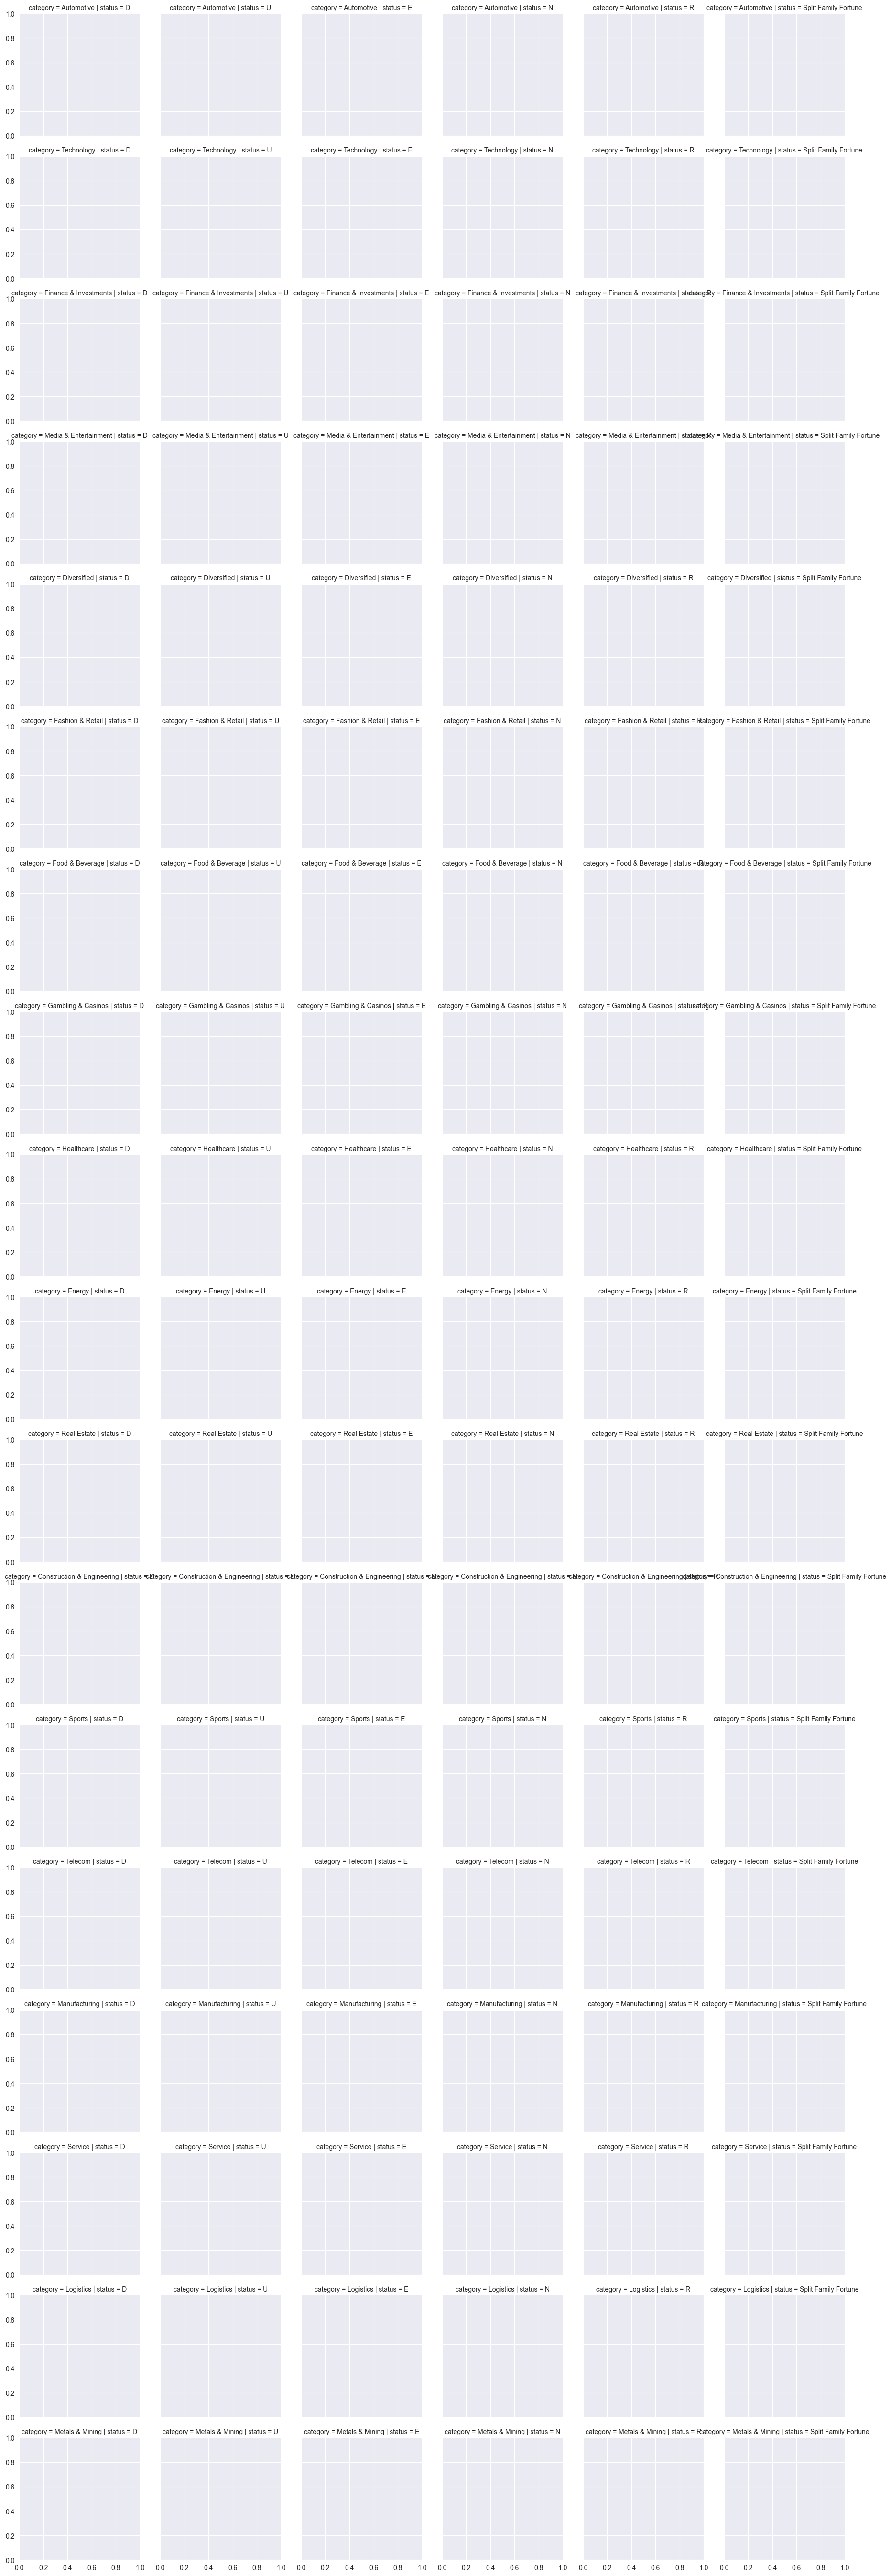

In [ ]:
# 1. Set up facet grid
g = sns.FacetGrid(df_bill_str_usa, col='status', row='category')

# 2. Specify plot type
g.map_dataframe(sns.histplot, x=df)

# 3. Customize/style the plot with methods and attributes
g.set_axis_labels('Average Billionaire Wealth', 'Bill Length (mm)')
g.set_titles(col_template='{col_name}', row_template='{row_name}')